 <h1><center> TP 1 Statistique : Regression OLS -Analyse de la base de données “investment data” <h1><center>

Dans ce TP , on propose d'appliquer la méthode de moindre carré ordinaire sur la base "Invest.txt" afin de determiner les variables qui agissent sur l'investissement . Une étude de significativité et d'intervalle de confiance sera élaborée également sur les paramètres du modèle et les prédictions calculées.

Tout d'abord on va importer les packages dont on aura besoin au cours du TP 

In [1]:
import pandas as pd # maniulation des données 
import numpy as np # opérations mathématiques

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import t  # determination des seuil de student et la valeur critique


from sklearn import linear_model ##pour la regression linéare
%matplotlib notebook 


## Question1 : Chargement de la base de données “invest.txt” et l'afficher

In [2]:

#### read data
url="https://bitbucket.org/portierf/shared_files/downloads/invest.txt"
df=pd.read_csv(url,names=["year","gnp","invest","cpi","interest"],sep=" ",skiprows=1)

df.head(5)  ## les 5 premieres observation

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## Question 2 : Transformation logarithmique et plot de la variable "investment" en fonction de la variable “Gross National Product” 

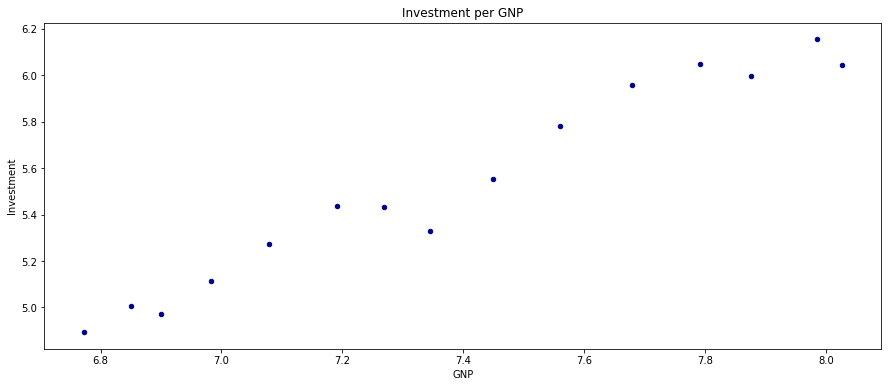

In [3]:


####log transformation

df["invest"]=np.log(df["invest"])
df["gnp"]=np.log(df["gnp"])


#### plot
df_p=df[["gnp","invest"]]
#df_p.plot(kind='line', x='gnp', y='invest', figsize=(15, 6), color='darkblue') # une ligne 
df_p.plot(kind='scatter', x='gnp', y='invest', figsize=(15, 6), color='darkblue') # nuage de points

plt.title('Investment per GNP')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.show()

On peut remarquer à partir du scatter plot qu'il y a une relation linéaire entre L'invesstissement et la GNP .

## Question3 : Estimation des paramètres 

Les formules permettant d'estimer les deux paramètres de la regression linéaire  et le coefficient de determination sont : 

#####  L'intercept
$$
  \hat{ \beta0 }= \bar{Y} - \hat{ \beta1 } * \bar{X} 
  $$
  
#####  La pente 
  $$
   \hat{ \beta1 }= \frac{\sum_1^N (xi- \bar{x}) * ( Yi-\bar{Y})}{\sum_1^N (xi- \bar{x})}   
$$

#####  Coefficient de corrélation

$$ p = \frac{\sum_1^N (xi- \bar{x}) * ( Yi-\bar{Y})} { \sqrt{\sum_1^N (xi- \bar{x})^{2} *\sum_1^N (Yi- \bar{Y})^{2} }}  $$


#####  Coefficient de Determination
$$ r2 =  p^{2} $$

Les formules ci-dessus ont été démontrées dans le cours . Le coefficient de determination peut etre calculé de différentes manières . L'approche adaptée consiste à calculerle carré du coefficient de corrélation.

In [4]:

############ estimationdes paramètres   invest=f(gnp)  ###############

y=df["invest"]
x=df["gnp"]
y_mean = y.mean()
x_mean = x.mean()

beta1 = ((x - x_mean) * (y - y_mean)).sum() / np.dot((x - x_mean),np.transpose(x - x_mean)) ## la pente / slope

beta0= y_mean - beta1* x_mean  #l'intercept



thetan=[beta0,beta1]  #sauvegarder les parametres dans un vecteur thetan




########### variance , ecartype et coefficient de determinatio  #############
nb_obs=df.shape[0]  # le nombre d'observation de l'échantillon

y_hat=beta0+beta1*x # calculter y_chapeau

r=y-y_hat# residu

sigma2=1/(nb_obs-2) * np.dot(r,np.transpose(r)) # calcul de sigma carrée en utilisant son estmation

var_beta0=sigma2 * (1/nb_obs+(x_mean*x_mean)/np.dot((x - x_mean),np.transpose(x - x_mean))) #variance beta0
sd_beta0=var_beta0**(1/2) # ecart-type de beta0
var_beta1=sigma2/np.dot((x - x_mean),np.transpose(x - x_mean))# variance de beta1
sd_beta1=var_beta1**(1/2) # ecart-type de beta1


### coefficient de corrélation -- coefficient de determination
beta1 = ((x - x_mean) * (y - y_mean)).sum() / np.dot((x - x_mean),np.transpose(x - x_mean))

coef_correlation = ((x - x_mean) * (y - y_mean)).sum() /(np.dot((x - x_mean),np.transpose(x - x_mean))*np.dot((y - y_mean),np.transpose(y - y_mean)))**(1/2)
coef_determination=coef_correlation**2  # on pourra utiliser l'expression de coefficient de determination directement


print("L'intercept : "+str(round(beta0,2))+ " , son écart-type est "+ str(round(sd_beta0,3)))
print("La pente : "+ str(round(beta1,2))+" , son écart-type est "+ str(round(sd_beta1,3)))
print("Le coefficient de determnation est "+str(round(coef_determination,2)))

L'intercept : -1.96 , son écart-type est 0.41
La pente : 1.02 , son écart-type est 0.055
Le coefficient de determnation est 0.96


## Question 4 : Etude de signficativité de la pente , test de l'hypothèse "H0 : la pente =0" 

On a démontré que  
 $$
 T0 = \frac{\hat{ \beta1 }-0}{   \sigma * \sqrt{\frac{1}{n}  +  \frac{ \bar{X} ^{2}}{\sum_1^N {(xi- \bar{x})}^{2} }   } } 
 $$ 
  ####  Suit un student de degré n-p-1  ( n= nombre d'obs  , p= nombe de covariables indépendants ) 
 Pour verifier la statistique de test à un seuil de 90% , on commence par calculer la statistique T0 et ensuite on la compare à la  quantile de student qu'on pourra la lire directement sur la table de student ou utiliserr la fonctin t.ppf du package stat .Si la statistique en valeur absolue est supérieure à la valeur critique de student , on rejette l'hypothèse , sinon on l'accèpte . 
 La p-value sera calculée avec la foncton t.cdf du package stat.

In [5]:

############################## test de rejet beta1 ###################
print ( "L'hypothèse H0 : la pente Beta1=0 ")
t_stat_beta1=beta1/sd_beta1  # la statistique du test

alpha = 0.05 # on fera un test à 95%
degreef=nb_obs-1-1 # degré de liberté : n-p-1
cv = t.ppf(1.0 - (alpha/2), degreef) # critical value , on pourra la lire aussi sur la table de loi de student

rejecth0_beta1=abs(t_stat_beta1) > cv  # true si on rejette l'hyothèse
 
p_val_beta1 = (1 - t.cdf(abs(t_stat_beta1), degreef)) * 2 # p_value

if rejecth0_beta1 :
    print("on rejette H0 , il faut garder le slope"+ "---- La p-value du test = "+ str(p_val_beta1))
else :
    print("on accepte H0 , il faut éliminer le slope"+ "---- La p-value du test = "+ str(p_val_beta1))



L'hypothèse H0 : la pente Beta1=0 
on rejette H0 , il faut garder le slope---- La p-value du test = 1.1363709973011282e-10


La p-value du test est faible et très inférieure à 0.1 , de ce fait , on rejette l'hypothèse que la pente soit nulle

## Question 5  : Prediction , intervalle de confiance et intervalle de prédiction

Pour GNP=1000 , l'invessement prédit par le modèle est donnée par la formule :

$$
 { Ypred }= \hat{ \beta1 } +  \hat{ \beta1 } * {log(1000)} 
$$

Cette formule donne le log(invessement) , il faut appliquer l'exponentiel pour avoir une valeur cohérente avec les données en entrée .

On utilisera directement les formules de l'intervalle de confiance et de prédiction  démontrés dans le cours .

Tout au long du TP , on affichera les résultats sur l'intervalle de confiance et la prédiction sans appliquer le log , mais le calcul sera fait avec le log . 


In [6]:


###############" predicition ##################
x_pred=np.log(1000) ## on a appliquer la transformation log sur x
y_pred=beta0+beta1*x_pred # calcul de y_chapaux pour x=log(1000)

print("Pour GNP=1000 , on estime un investissement =",round(np.exp(y_pred),1))


alpha = 0.10 # niveau de confiance 90%
degreef=nb_obs-1-1 # degré de liberté - nombre de covariable -1
cv = t.ppf(1.0 - (alpha/2), degreef) # critical value

x0=np.log(1000)
t1=(x0-x.mean())**2 # on  calcule les termes de l'IC un par un pour rendre la formule lisible
t2=np.dot((x - x_mean),np.transpose(x - x_mean))
born_sup_PI=y_pred+cv*(sigma2*(1+(1/nb_obs)+ t1/t2))**0.5# borne sup de l'intervalle de prédiction
born_inf_PI=y_pred-cv*(sigma2*(1+(1/nb_obs)+ t1/t2))**0.5# borne inf de l'intervalle de pédiction

born_sup_CI=y_pred+cv*(sigma2*((1/nb_obs)+ t1/t2))**0.5# borne sup de l'intervalle de Conf
born_inf_CI=y_pred-cv*(sigma2*((1/nb_obs)+ t1/t2))**0.5# borne inf de l'intervalle de Conf


print("L'intervalle de confiance sur  y_pred = "+str(round(np.exp(y_pred),1))+ 
" est [ "+ str(round(np.exp(born_inf_CI),1))+" , "+str(round(np.exp(born_sup_CI),1))+ " ] " )


print("L'intervalle de prédiction sur y_pred = "+str(round(np.exp(y_pred),1))+ 
" est [ "+ str(round(np.exp(born_inf_PI),1))+" , "+str(round(np.exp(born_sup_PI),1))+ " ] " )



Pour GNP=1000 , on estime un investissement = 156.0
L'intervalle de confiance sur  y_pred = 156.0 est [ 146.7 , 165.9 ] 
L'intervalle de prédiction sur y_pred = 156.0 est [ 132.0 , 184.3 ] 


## Question 6 : Plot de  la courbe de regression , les courbes de confiance et de prédiciton

Afin de faciliter le plot des courbes de confiance et de prédiction , on  utilisera deux fonction bsupCI et bsupPI qui calculent respectivement les intervalles de confiance et de prédiciton pour un x0 pris comme input .

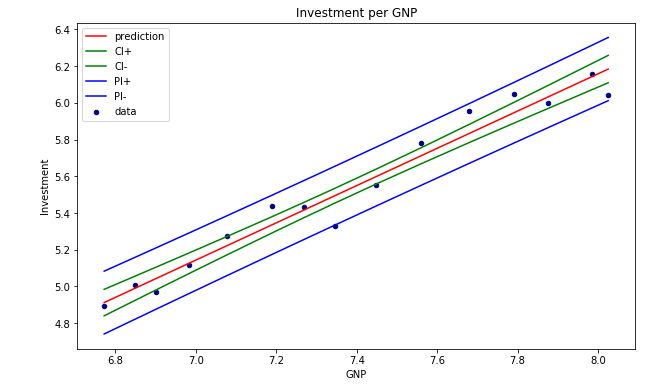

In [7]:

### funcion that return the CI for each predicition
def bsupCI(x0) :
    y_pred=beta0+beta1*x0
    t1=(x0-x.mean())**2
    t2=np.dot((x - x_mean),np.transpose(x - x_mean))
    born_sup=y_pred+cv*(sigma2*((1/nb_obs)+ t1/t2))**0.5  
    born_inf=y_pred-cv*(sigma2*((1/nb_obs)+ t1/t2))**0.5
    return [born_inf,born_sup]

### funcion that return the CP for each predicition
def bsupPI(x0) :
    y_pred=beta0+beta1*x0
    t1=(x0-x.mean())**2
    t2=np.dot((x - x_mean),np.transpose(x - x_mean))
    born_sup=y_pred+cv*(sigma2*(1+(1/nb_obs)+ t1/t2))**0.5  
    born_inf=y_pred-cv*(sigma2*((1+1/nb_obs)+ t1/t2))**0.5
    return [born_inf,born_sup]



################### Plot ####################
df_p=df[["gnp","invest"]]
df_p.plot(kind='scatter', x='gnp', y='invest', figsize=(10, 6), color='darkblue',label="data")
plt.title('Investment per GNP')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.plot(x, beta1 * x + beta0, color='red',label="prediction") # recall that x is the Years
plt.plot(x, bsupCI(x)[1], color='green',label="CI+") # recall that x is the Years
plt.plot(x, bsupCI(x)[0], color='green',label="CI-") # recall that x is the Years
plt.plot(x, bsupPI(x)[1], color='blue',label="PI+") # recall that x is the Years
plt.plot(x, bsupPI(x)[0], color='blue',label="PI-") # recall that x is the Years
plt.legend(loc='upper left')
plt.annotate("y={0:.0f} x + {1:.0f}".format(beta1, beta0),xy=(20,20))
plt.show()

## Question 7 :  Estimation en utilisant LinearRegression() de sklearn.linear_model

Dans cette partie , on utilisera la librairie linear_model du package sklearn pour estimer les paramètres de la regression OLS et établir la prédiction : Création de l'instance LinearRegression , Fit le modèle et Extraire les parmètres et faire la prédiction

In [8]:

################ using linearregression


y = df["invest"]
X = df[["gnp"]]
skl_lm = linear_model.LinearRegression(fit_intercept=True) # instanciation du modèle
skl_lm.fit(X, y) # fit
beta0_sklearn=skl_lm.intercept_ #recupère l'intercept
beta1_sklearn=skl_lm.coef_[0] # recupère le slope
coef_determination_sklearn=skl_lm.score(X, y) # calcul de coef de determination
y_pred_sklearn=skl_lm.predict(np.array(np.log(1000)))[0] # calcul de prédiction pour gnp=1000

print( "Les paramètres de l'estimation sklearn : intercept = "+ str(round(beta0_sklearn,2))+ " ,   slope = "+ str(round(beta1_sklearn,2))+ " ,   prediction  = "+ str(round(np.exp(y_pred_sklearn)))+
",   coefficient de determination = " +str(round(coef_determination_sklearn,2)))



################### comparaison des résultats ####################

print('* Are the two computations of beta1' +
      ' the same? This is {} and beta1={}'.format(np.isclose(beta1_sklearn, beta1),beta1_sklearn))

print('* Are the two computations of beta0' +
      ' the same? This is {} and beta0={}'.format(np.isclose(beta0_sklearn, beta0),beta0_sklearn))

print('* Are the two computations of coef_determination' +
      ' the same? This is {} and coef_determination={}'.format(np.isclose(coef_determination_sklearn, coef_determination),coef_determination_sklearn))

print('* Are the two computations of prediction' +
      ' the same? This is {} and y_pred={}'.format(np.isclose(coef_determination_sklearn, coef_determination),coef_determination_sklearn))

Les paramètres de l'estimation sklearn : intercept = -1.96 ,   slope = 1.02 ,   prediction  = 156.0,   coefficient de determination = 0.96
* Are the two computations of beta1 the same? This is True and beta1=1.015281401598871
* Are the two computations of beta0 the same? This is True and beta0=-1.9635913352301815
* Are the two computations of coef_determination the same? This is True and coef_determination=0.9627572956057855
* Are the two computations of prediction the same? This is True and y_pred=0.9627572956057855


On vérifie bien que le calcul avec les formules théoriques et celui avec le module LineaRegression donnent les memes résultats .

## Question 8  : Plot de la droite de regression et de la valeur prédite

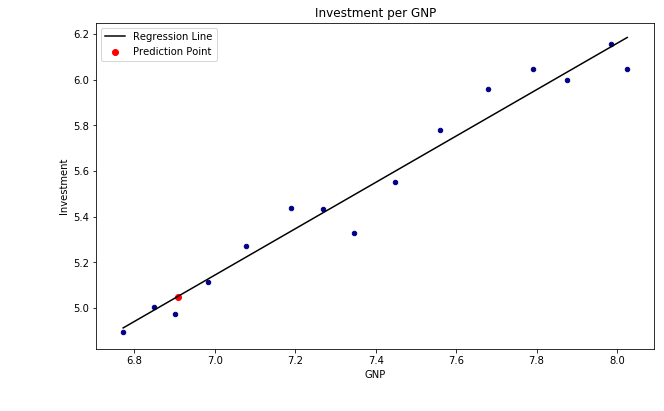

In [9]:

################### Plot ####################
df_p=df[["gnp","invest"]]
df_p.plot(kind='scatter', x='gnp', y='invest', figsize=(10, 6), color='darkblue')#le nuage de points init
plt.title('Investment per GNP')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.plot(x, beta1_sklearn* x + beta0_sklearn, color='black',label='Regression Line') # droite avec les coef estimés
plt.scatter(np.log(1000),y_pred_sklearn,color='red',label="Prediction Point") #le point de prédiction en rouge
plt.annotate("y={0:.0f} x + {1:.0f}".format(beta1, beta0),xy=(1,1)) 
plt.legend(loc='upper left')

plt.show()



## Question 9 : Matrice de Gram

Pour ce TP , on va adopter la définition suivante de la matrice de Gram :
$$
GRAM= \frac{1}{n} *  X^{t}X
$$

In [10]:
X_new=df[["gnp","interest"]] # extraire les colonnes dont on aura besoin
X_new.insert(0, 'cst', 1)  # mettre la cst comme 1ere colonne
X_new=X_new[["cst","gnp","interest"]]
gram=1/nb_obs * np.transpose(X_new).dot(X_new)  # calcul de matrice de Gram  
list_eigenvalues=np.linalg.eig(gram)[0] # récupération des valeurs propres

### on teste s'il y a une valeur propre nulle 
testinvers=True
for i in range(len(list_eigenvalues)):
    testinvers=list_eigenvalues[i]!=0

if testinvers==True :
    print( "Les valeurs propres sont différentes de 0 , la matrice de Gram est inversible et de Rang = 3")
    
if testinvers==False :
    print( "La matrice de Gram n'est pas inversible")

Les valeurs propres sont différentes de 0 , la matrice de Gram est inversible et de Rang = 3


## Question 10: Estimation des paramètres et calcul de significativité

La matricielle de la solution de la regression OLS est : 

$$
  \widehat{\theta  }  = {(X^{t}X)}^{-1} X^{t} Y
$$


Pour notre cas , la matrice X est formée par un vecteur constant=1 et les deux variables "gnp" et "interest" .
Afin de rendre le code plus compréhensif , on a refait le calcul de la matrice $$ X^{t}X $$

In [11]:
X_new=df[["gnp","interest"]] ## recupérer les deux premières variables
X_new.insert(0, 'cst', 1) ## ajouter un vecteur constant à la position 0 de la matrice
gram=np.transpose(X_new).dot(X_new) ## calculer la matrice de GRAM sans 1/n (juste un calcul intermédiare)
gram_1=np.linalg.inv(gram)# inverser la matrice 
thetan=gram_1.dot(X_new.T).dot(df["invest"]) # multiplier GRAM par  la transposé de X et la variable à expliquer "invest"
beta0=thetan[0] # l'intercept
beta1=thetan[1] # coef gnp
beta2=thetan[2] # coef interest
print("L'intercept = "+ str(round(beta0,3))+ "  , coef GNP = "+str(round(beta1,3))+",  coef Interest = "+ str(round(beta2,3)))


L'intercept = -2.18  , coef GNP = 1.051,  coef Interest = -0.007


Pour les écarts-types des coefficients, on calculera tout d'abord la variance de Theta_hat donnée par  :


$$ var(\widehat{\theta  }) = \sigma^{2} * (X^{t}X)^{-1}
$$
Avec
$$
 \sigma^{2} = \frac{1}{n-p-1} * {\sum_1^N ri^{2}} 
$$
( p = nombre de covariables indépendantes = 2 , ri =les résidus= y_hat - y)


Les écarts-types seront alors les racines des élements diagonaux de la matrice de variance . 

Le coefficient de détermination est calculé à partir de la formule ci-dessous : 

$$
1- \frac{\sum_1^N (Yi- \hat{Y})^{2} } {\sum_1^N (Yi- \bar{Y})^{2} }
$$

In [12]:

####### calcul des écart-types
y_hat=beta0+beta1*X_new["gnp"]+beta2*X_new["interest"]
y_hat
y=df["invest"]
r=y-y_hat# calcul des residus

sigma2=1/(nb_obs-3) * np.dot(r,np.transpose(r)) # calcul sigma2
xxt=X_new.T.dot(X_new)
sd_beta0=(sigma2*np.linalg.inv(xxt)[0,0])**0.5
sd_beta1=(sigma2*np.linalg.inv(xxt)[1,1])**0.5
sd_beta2=(sigma2*np.linalg.inv(xxt)[2,2])**0.5

####### Calcul du coefficient de determination

coef_determination= 1-np.dot(r,np.transpose(r)) /np.dot(y-y.mean(),np.transpose(y-y.mean())) 

print("Les écart-types de l'intercept , GNP et interest sont respectivement "+ str(round(sd_beta0,3))+ " , "+ str(round(sd_beta1,3)) + " et "+ str(round(sd_beta2,3)))
print("le coefficient de determination est : "+str(round(coef_determination,2)))

Les écart-types de l'intercept , GNP et interest sont respectivement 0.662 , 0.102 et 0.015
le coefficient de determination est : 0.96


On reprenant la formule matricielle de la statistique du test  T0  ( pour l'hypothèse de nulleté )et en projettant sur les 3 vecteurs de la  base orthonormée standard , on peut conclure que la statistique du test pour chaque coefficient n'est que sa valeur estimée par le modèle divisée par son écart-type  : 

In [13]:
def calcul_signif(beta,sd,conf_level,degreeliberte): ## fonction qui vérifie la siginificativité et calcule la p-val
    t_stat_beta=beta/sd  
    alpha = 1-conf_level 
    cv = t.ppf(1.0 - (alpha/2), degreeliberte) # critical value , on pourra la lire aussi sur la table de loi de student
    rejecth0_beta=abs(t_stat_beta) > cv   # true si on rejette l'hyothèse
    p_val_beta= (1 - t.cdf(abs(t_stat_beta),degreeliberte)) * 2
    return [rejecth0_beta,p_val_beta]

##### calcul de significativité 
sig_intercept=calcul_signif(beta0,sd_beta0,0.95,15-3)#degré de liberté= 15 -(2+1)=12
sig_gnp=calcul_signif(beta1,sd_beta1,0.95,15-3)
sig_interest=calcul_signif(beta2,sd_beta2,0.95,15-3)

print( "* L'intercept =   Significatif : "+ str(sig_intercept[0])+ ", La p-value du test : "+ str(sig_intercept[1]))
print( "* Le coef de GNP =   Significatif : "+ str(sig_gnp[0])+ ", La p-value du test : "+ str(sig_gnp[1]))
print( "* Le coef de l'Interest =   Significatif : "+ str(sig_interest[0])+ ", La p-value du test : "+ str(sig_interest[1]))


* L'intercept =   Significatif : True, La p-value du test : 0.006438367050927374
* Le coef de GNP =   Significatif : True, La p-value du test : 2.5995168484449493e-07
* Le coef de l'Interest =   Significatif : False, La p-value du test : 0.6780071418837097


D'après ces résultats ,on peut conclure que la variable interest n'est pas significative pour expliquer la variance du modèle  ( à 95% près ) et on pourra tester avec une forward selection si on peut l'éliminer ou non  . Par contre , la variable GNP est significative .
On vérifie également que le coefficient de determination a augmenté en ajoutant la variable "interest".

## Question 11 : Prediction , Intervalle de confiance et Intervalle de prédiction

On utilisera les expressions ci-dessous pour l'intervalle de confiance ( CI ) et l'intervalle de prédiction ( PI )

$$
CI= X^{t} \widehat{\theta  } + Q_{n-p-1} ( 1-\frac{\alpha}{2} ) \widehat{\sigma} \sqrt{ x^{t} (X^{t}X)^{-1}x}
$$

$$
PI= X^{t} \widehat{\theta  } + Q_{n-p-1} ( 1-\frac{\alpha}{2} ) \widehat{\sigma} \sqrt{1+ x^{t} (X^{t}X)^{-1}x}
$$

avec  Q_{n-p-1}est la quantile de la distribution de student T_{n-p-1} . Pour notre cas  n=15 et  p=2 


In [14]:
y_pred=beta0+beta1*np.log(1000)+beta2*10   # la prediction en log
print("Pour GNP = 1000 et interest =10% , on aura un investissement = "+ str(round(np.exp(y_pred),2)))

Pour GNP = 1000 et interest =10% , on aura un investissement = 150.8


In [15]:
## intervalle de confiance

x0=pd.DataFrame([1,np.log(1000),10])
thetan=pd.DataFrame([beta0,beta1,beta2])

alpha = 0.001 # niveau de confiance
degreef=nb_obs-2-1 # degré de liberté - nombre de covariable -1
cv = t.ppf(1.0 - (alpha/2), degreef) # critical value

bsupCI=y_pred+cv*(sigma2*np.dot(np.dot(np.transpose(x0),gram_1),x0))**0.5
binfCI=y_pred-cv*(sigma2*np.dot(np.dot(np.transpose(x0),gram_1),x0))**0.5

bsupPI=y_pred+cv*(sigma2*(1+np.dot(np.dot(np.transpose(x0),gram_1),x0)))**0.5
binfPI=y_pred-cv*(sigma2*(1+np.dot(np.dot(np.transpose(x0),gram_1),x0)))**0.5

print("Pour GNP = 1000 et interest =10% , on aura un investissement = "+ str(round(np.exp(y_pred),2)) )
print("L'intervalle de confiance est ["+str(round(np.exp(binfCI[0][0]),2)) +" , "+  str(round(np.exp(bsupCI[0][0]),2))+" ]  , " +
     "L'intervalle de confiance avec log est ["+str(round((binfCI[0][0]),2)) +" , "+  str(round((bsupCI[0][0]),2))+" ]")
print("L'intervalle de prédiction est ["+str(round(np.exp(binfPI[0][0]),2)) +" , "+  str(round(np.exp(bsupPI[0][0]),2))+" ] ,  "+
     "L'intervalle de prédiction avec log est ["+str(round((binfPI[0][0]),2)) +" , "+  str(round((bsupPI[0][0]),2))+" ]")



Pour GNP = 1000 et interest =10% , on aura un investissement = 150.8
L'intervalle de confiance est [103.56 , 219.59 ]  , L'intervalle de confiance avec log est [4.64 , 5.39 ]
L'intervalle de prédiction est [87.69 , 259.35 ] ,  L'intervalle de prédiction avec log est [4.47 , 5.56 ]


## Question 12 : Affichage des courbes en 3D

Pour l'affichage , on commence par créer deux fonctions Conf_int et Pred_int qui permettent de calculer respectivement l'intervalle de confiance et l'intervalle de prédiction pour un x donnée . 

<IPython.core.display.Javascript object>


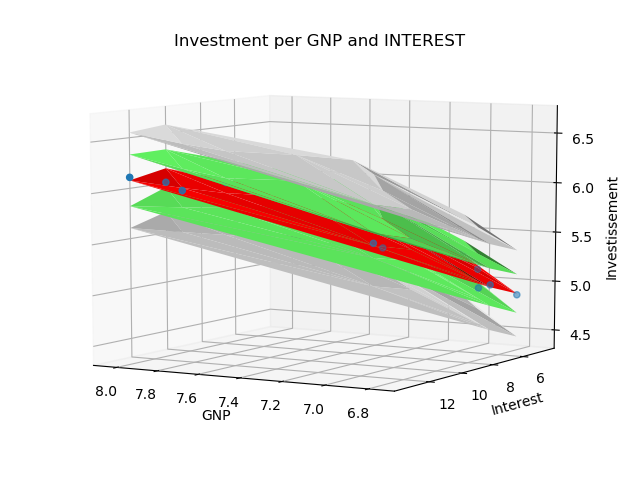

In [16]:
%matplotlib notebook 


###################################### Fonctions intermédiaires #########################################
###### Une fonction qui permet de définir les intervalles de confiances pour chaque x0

def Conf_int(gnp,interest):
    y_pred=beta0+beta1*gnp+beta2*interest

    x0=pd.DataFrame([1,gnp,interest])
    thetan=pd.DataFrame([beta0,beta1,beta2])

    alpha = 0.001 # niveau de confiance
    degreef=nb_obs-2-1 # degré de liberté - nombre de covariable -1
    cv = t.ppf(1.0 - (alpha/2), degreef) # critical value

    bsup=y_pred+cv*(sigma2*np.dot(np.dot(np.transpose(x0),gram_1),x0))**0.5
    binf=y_pred-cv*(sigma2*np.dot(np.dot(np.transpose(x0),gram_1),x0))**0.5
    return [binf.squeeze().item() ,bsup.squeeze().item()]


###### Une fonction qui permet de définir les intervalles de prédiction pour chaque x0

def Pred_int(gnp,interest):
    y_pred=beta0+beta1*gnp+beta2*interest

    x0=pd.DataFrame([1,gnp,interest])
    thetan=pd.DataFrame([beta0,beta1,beta2])

    alpha = 0.001 # niveau de confiance
    degreef=nb_obs-2-1 # degré de liberté - nombre de covariable -1
    cv = t.ppf(1.0 - (alpha/2), degreef) # critical value

    bsup=y_pred+cv*(sigma2*(1+np.dot(np.dot(np.transpose(x0),gram_1),x0)))**0.5
    binf=y_pred-cv*(sigma2*(1+np.dot(np.dot(np.transpose(x0),gram_1),x0)))**0.5
    return [binf.squeeze().item() ,bsup.squeeze().item()]


x = df["gnp"]
y = df["interest"]
z =beta0+beta1*x+beta2*y ## calcul du vecteur de prédiction.



      ###################################### plot  #################################################
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## on affiche la surface de prédiction
predplt=ax.plot_trisurf(x,y,z, linewidth=0.5,color="red", label="Prediction") 

## on affiche les données en scatter
scplt=ax.scatter(x,y,df["invest"], label="Données")

## les intervalles de confiances
CI_inf=ax.plot_trisurf(x,y,(list(map(lambda x1,y1:Conf_int(x1,y1)[0] ,x,y))), linewidth=0.1,color=( 102/255, 255/255, 102/255),label="IC")
CI_sup=ax.plot_trisurf(x,y,(list(map(lambda x1,y1:Conf_int(x1,y1)[1] ,x,y))), linewidth=0.1,color=( 102/255, 255/255, 102/255),label="IC")

## Les intervalles de prédiction
PI_inf=ax.plot_trisurf(x,y,(list(map(lambda x1,y1:Pred_int(x1,y1)[0] ,x,y))), linewidth=0.1,color=( 230/255, 230/255, 230/255),label="IP")
PI_sup=ax.plot_trisurf(x,y,(list(map(lambda x1,y1:Pred_int(x1,y1)[1] ,x,y))), linewidth=0.1,color=( 230/255, 230/255, 230/255),label="IP")


ax.view_init(elev=8, azim=120) #initial position
ax.set_xlabel('GNP')
ax.set_ylabel('Interest')
ax.set_zlabel('Investissement')
ax.set_title('Investment per GNP and INTEREST')
#ax.legend([predplt,scplt],['cars','bikes'])
#plt.legend(handles=[predplt,scplt,CI_inf,CI_sup,PI_inf,PI_sup])
fig.tight_layout()
plt.show()

 <li>&nbsp; &nbsp; -Les données sont affichées en bleu avec un scatter plot  
 <li>&nbsp; &nbsp; -La surface de prédicition en rouge
 <li>&nbsp; &nbsp; -Les surfaces de l'intervalle de confiance en vert
 <li>&nbsp; &nbsp; -Les surfaces de l'intervalle de prédicition en gris

 ## Question 13 : Estimation en utilisant LinearRegression() de sklearn.linear_model

In [17]:

################ using linearregression

y = df["invest"]
X = df[["gnp","interest"]]
skl_lm = linear_model.LinearRegression(fit_intercept=True)
skl_lm.fit(X, y)
beta0_sklearn=skl_lm.intercept_
beta1_sklearn=skl_lm.coef_[0]
beta2_sklearn=skl_lm.coef_[1]

coef_determination_sklearn=skl_lm.score(X, y)
x0=np.array([np.log(1000),10])
y_pred_sklearn=skl_lm.predict(x0.reshape(-1,2))[0]

print("Les paramètres de l'estimation sklearn : intercept = "+ str(round(beta0_sklearn,2))+ " ,   coef GNP = "+ str(round(beta1_sklearn,2))+"  , coef Interest= "+ str(round(beta2_sklearn,2))+ 
      " ,   prediction  = "+ str(round(np.exp(y_pred_sklearn),2))+
 ",   coefficient de determination = " +str(round(coef_determination_sklearn,2)))


Les paramètres de l'estimation sklearn : intercept = -2.18 ,   coef GNP = 1.05  , coef Interest= -0.01 ,   prediction  = 150.8,   coefficient de determination = 0.96


In [18]:
#######" comparaison des résultats ############

print('* Are the two computations of beta2' +
      ' the same? This is {} and beta2={}'.format(np.isclose(beta2_sklearn, beta2),beta2_sklearn))

print('* Are the two computations of beta1' +
      ' the same? This is {} and beta1={}'.format(np.isclose(beta1_sklearn, beta1),beta1_sklearn))

print('* Are the two computations of beta0' +
      ' the same? This is {} and beta0={}'.format(np.isclose(beta0_sklearn, beta0),beta0_sklearn))

print('* Are the two computations of coef_determination' +
      ' the same? This is {} and coef_determination={}'.format(np.isclose(coef_determination_sklearn, coef_determination),coef_determination_sklearn))

print('* Are the two computations of prediction' +
      ' the same? This is {} and y_pred={}'.format(np.isclose(coef_determination_sklearn, coef_determination),coef_determination_sklearn))

* Are the two computations of beta2 the same? This is True and beta2=-0.006528879406068252
* Are the two computations of beta1 the same? This is True and beta1=1.0512426913196595
* Are the two computations of beta0 the same? This is True and beta0=-2.1804547259114004
* Are the two computations of coef_determination the same? This is True and coef_determination=0.9633108306726245
* Are the two computations of prediction the same? This is True and y_pred=0.9633108306726245


On vérifie bien que le module LinearRegression donne les memes valeurs que celles du calcul avec les expressions théoriques